In [2]:
# We import the required modules
%pylab inline
import cv2
import math
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


(128, 128)


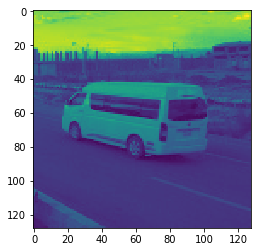

In [3]:
# We import the sample image in gray scale
img = cv2.imread('gray128.jpg',0)
#cv2.imshow('Imagen 128x128',img)
print(img.shape)
imshow(img)

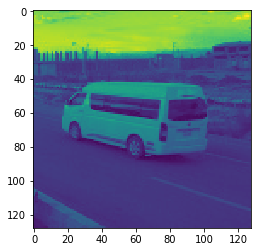

In [4]:
imshow(img)

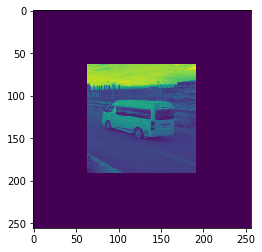

In [5]:
# We construct the canvas:
def getPaddedImage(imagen):
    times_padding = 2
    canvas = np.zeros((times_padding*128,times_padding*128))
    img_in_canvas = canvas
    img_in_canvas[64:192,64:192] = imagen
    return img_in_canvas

img_in_canvas = getPaddedImage(img)
imshow(img_in_canvas)

In the paper there is a matrix factorization in the form:
$M_{\theta} = M_{x}*M_{y}*M_{x}$

We get the matrices in the next implementation

In [6]:
# We make some definitions for the methods
def getRotationMatrices(angleInRads):
    mx = np.array([[1,math.tan(angleInRads/2)],
                   [0,1]])
    my = np.array([[1,0],
                   [-math.sin(angleInRads),1]])
    return mx,my

In [7]:
getRotationMatrices(math.pi)

(array([[1.00000000e+00, 1.63312394e+16],
        [0.00000000e+00, 1.00000000e+00]]),
 array([[ 1.0000000e+00,  0.0000000e+00],
        [-1.2246468e-16,  1.0000000e+00]]))

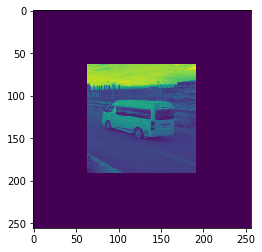

In [8]:
float_formatter = lambda x: "%.2f" % x
#print(float_formatter(1.234567E3))
np.set_printoptions(formatter={'float_kind':float_formatter})
## Functions to go from image to frequency-image and back
im2freq = lambda data: fp.fft(fp.fft(data, axis=0),axis=1)
freq2im = lambda f: fp.ifft(fp.ifft(f, axis=1),axis=0)

# Transforming
#print('Image:',img)
freq = im2freq(img_in_canvas)
#print('Freq:',freq)
imshow(freq.imag)
back = freq2im(freq)
#print('Diff: {}'.format(back-img))
imshow(back.real)

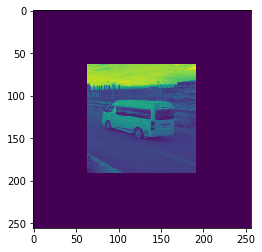

In [16]:
img_in_canvas = getPaddedImage(img)
imshow(img)
imshow(img_in_canvas)


Iterando en X:  256  en Y,  256  en X:  256
[[ -72614.07679391 +43839.19790924j  -77391.83667585 +34715.74625292j
   -81028.68184636 +25080.5131566j  ...  -29011.78382896 +79705.68248889j
    58690.49984573+295871.21547605j  628781.70117886-145234.09728599j]
 [ -72614.07679391 +43839.19790924j   84335.08237001  +9070.46325171j
   -61631.13941457 -58277.62929649j ...   69069.74701211 +49234.63688949j
  -248407.429747  -171108.44446112j  575367.75076718-292252.15504592j]
 [ -72614.07679391 +43839.19790924j  -68239.69043494 -50378.80577486j
    20512.56447039 -82303.7916551j  ...   65884.74432784 -53421.71737049j
   297358.88354155 -50616.65040611j  488150.43191819-422100.13808331j]
 ...
 [ -72614.07679391 +43839.19790924j   12798.30151857 +83850.36016737j
    82385.6754052  +20181.17712092j ...   77959.60694623 -33421.23736111j
  -189596.68800035-234600.61129228j  275267.37991575+583684.19569677j]
 [ -72614.07679391 +43839.19790924j   31252.54931339 -78854.02705868j
    22866.03455885 +8

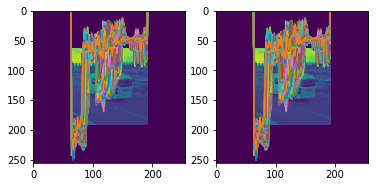

In [34]:
# Creating the LinSpaces:
Xaxes      = np.linspace(0, 256, 256)
Yaxes      = np.linspace(0, 256, 256)
# Creating the displacement exponentials
# Rotating an angle of 45 degrees leads to a shifting parameters:
theta = math.pi/4
a = math.tan(theta/2)
b = -math.sin(theta)
#print(b)

def Xshift(y0):
    return np.exp( -2.*math.pi*1j*Xaxes*a*y0)
def Yshift(x0):
    return np.exp( -2.*math.pi*1j*Yaxes*b*x0)
def applyToImage(img):
    print('Iterando en X: ',img.shape[1],' en Y, ',img.shape[0], ' en X: ',img.shape[1])
    for index_x in range(img.shape[0]):
        # Fila
        img[index_x,:] = np.multiply(img[index_x,:],Yshift(index_x))
    for index_y in range(img.shape[1]):
        # Columna
        img[:index_y] = np.multiply(img[:,index_y],Xshift(index_y))
    for index_x in range(img.shape[0]):
        # Fila
        img[index_x,:] = np.multiply(img[index_x,:],Yshift(index_x))
    #for index_y in range(img.shape[1]):
    #    # Columna
    #    img[:index_y] = np.multiply(img[:,index_y],Xshift(index_y))
    return img

plt.subplot(1,2,1)
plt.plot(img_in_canvas)
plt.imshow(img_in_canvas)
freqImg = im2freq(img_in_canvas)

backImg = freq2im(freqImg)
plt.subplot(1,2,2)
plt.plot(img_in_canvas)
plt.imshow(backImg.real)
imsave('back.jpg',backImg.real)
#plt.clf()

rotatedInFreq = applyToImage(freqImg)
print(rotatedInFreq)


[[-726.28 -116.11 51.23 ... -34.15 -333.86 -210.22]
 [54.75 -39.11 -67.93 ... -24.25 -7.57 -56.21]
 [360.21 -173.33 -377.58 ... -23.45 -153.36 -108.29]
 ...
 [-657.55 -119.28 -156.94 ... 355.33 -375.72 -174.49]
 [427.28 32.40 37.61 ... -258.76 211.84 50.41]
 [239.39 -54.04 -117.62 ... -191.86 50.32 6.44]]


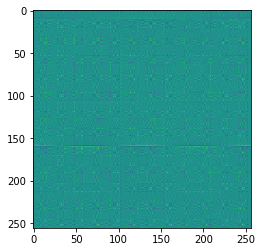

In [35]:
rotated = freq2im(rotatedInFreq)
print(rotated.real)
imshow(rotated.real)